# **Copy this file on your Gdrive and rename it "final_assignment_2023_xxxxxxx.ipynb" where xxxxxxx is your student number. When finished submit this on GoogleClassroom**

Reference Colabs:

[`Pandas` survival kit](https://colab.research.google.com/drive/1wreVhyqQBBH37g0pUt2XrrXOf-IifDSJ?usp=sharing) and [Pandas practice](https://colab.research.google.com/drive/1Q4AWWj5F-7egWYMu85kS3kdrIRssnjbZ?usp=share_link) for manipulating DataFrames, [Multiple linear regression](https://colab.research.google.com/drive/13OyARZ1R9D7Kyh_ZWkZNN9b9DwbqkqFn?usp=sharing) for the basic of `sci-kit learn` with the model `linear_model.LinearRegression()`.

**Please answer the question. Who have you worked with for which questions?** 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
## import standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
#import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import tree
pd.options.mode.chained_assignment = None  # default='warn'

# <u>Data Analysis of survivors of the 1912's Titanic sinking.</u>
The **purpose** of this Colab is to test a classifying model for binary data (two outcome: "survived" or "died") of the passengers of the *Titanic* (cruise boat that sunk in its 1912's maiden voyage, not the James Cameron 1998's movie). 

There are several machine learning models for a binary response variable (here "Survived" or "Died"), and Linear Regression is not well suited for this. We are going to use *Decision Tree*s (among the family of models "tree classifiers"). It consists in building successive decision trees (root=question, leave = answer), that ultimately give a decision. "Survived" or "Died").

*Example: A decision tree that decides if a person is likely to play computer games* 

*(source: (https://www.geeksforgeeks.org/decision-tree-introduction-example/)*
 <img src="https://drive.google.com/uc?export=view&id=1flK3rlyyRtVZ59L4-DHcg4VeXgKuUaca">

## Part A. Reading  data




#### 1.The data file is in csv format. It is shared with you on Gdrive at the path written below. After mounting your GoogleDrive to this Colab, read the file into a Pandas' DataFrame **called `df`**.

*(To mount your Gdrive here, you must be disconnected from all your gmail account, but your Tohoku's dc one)*


In [3]:
path_to_data_file="/content/drive/Shareddrives/INF-DATA-2022/Survived.csv"
## Type the command to read the csv file
df = pd.read_csv(path_to_data_file)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


#### 2.Type a Pandas command to display the first 5 rows and headers.

In [ ]:
df.iloc[0:5,0:5]

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


**Explanation of headers** (headers=columns' labels)

* `'PassengerId'`: Passenger's id number (unimportant)

* `'Survived'`:  0= No, 1=Yes  (type is `int`)

* `'Pclass'`: Passenger's class. 3=lower, 2=middle, 1=upper (type is `int`)

* `'Sex'`: 'male' or 'female' (type is `str`)

* '`Age`': (type is `float`)

* '`SibSp'`: Siblings/Spouse, number accompanying brothers/sisters/spouse. (type is `int`)

* '`Parch'`: Parents/Children. number of accompanying children or parents.

* '`Ticket`': Ticket's ID. (Unimportant.)

* `'Fare'`: ticket's fare (type is `float`)

* `'Cabin`': Number of the cabin

* `'Embarked`': Port of embarkation 'C', 'Q', 'S' (type is `str`). 
'C'=Cherbourg, 'Q'=Queensland, 'S'=Southampton

#### 3.Type a Pandas command that shows a summary of the data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### 4.Write a program <u>based on boolean selection</u> that counts the number of survivors and dead passengers.

*Do not use fancy Pandas commands*

In [ ]:
df_survivors = df[df['Survived'] == 1]
df_dead = df[df['Survived'] == 0]

survivors = len(df_survivors)
dead = len(df_dead)
print("Survivors: " + str(survivors))
print("Dead: " + str(dead))

Survivors: 342
Dead: 549


*Remark:* We observe that the targeted binary variable `'Survived`' is unbalanced, in that there are siginificantly more dead passengers than survivors. This affects the data analysis based on Decision Trees and requires some pre-processing. We will not deal with this here and simply let `scikit-learn` do that: it suffices to add an option in the model's fitting command (see question 9.  `class_weight='balanced'`).

## Part B.  Processing missing values `NaN`

#### 5.Type a Pandas' command that counts the number of missing values in each column.

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Column `'Cabin`', without more location information of that cabin in the boat, carries little information about whether the passenger survived or not, so it is an unimportant column that will not be part of features.









#### 6.Write a program that counts the number of passengers that have embarked in each of the three ports 'C', 'S' or 'Q'.

*Do not use fancy Pandas commands*

In [13]:
## Write a program that counts the number of passengers that have embarked in each of the three ports.

portC = len(df[df["Embarked"] == "C"])
portS = len(df[df["Embarked"] == "S"])
portQ = len(df[df["Embarked"] == "Q"])

print(portC)
print(portS)
print(portQ)

168
644
77


#### 7.**Filling `'Embarked'`**. There are only two missing values for `'Embarked'`. Fill these missing values with the most frequent port of embarkation 'C', 'S' or 'Q'.

In [14]:
# Identify the port of embarkation  in question 6.

df1 = df.fillna({"Embarked": "S"})

#### 8.**Filling `'Age'`**: Fill `NaN`s in column '`Age'` with the mean age.

In [15]:
# type a Pandas's command that fills the NaN in column's `'Age'` with the mean age of all passengers.
 
df1 = df1.fillna({"Age": df1["Age"].mean()})
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### 9.Decision Tree can only deal with numerical data.

9.(a) The response column is `'Survived'`. Write the list `features` of columns' labels (=headers) that you think are meaningful for data analysis. These columns' values must be numbers (`int` or `float`). 

9.(b) Define `dfx` as the DataFrame whose columns are in the list `features` you have defined in 9.(a)

Define `res` as the column `'Survived'`.

In [16]:
features=["Pclass", "Age", "SibSp", "Parch", "Fare"]
# Define the DataFrame dfx whose columns are given by `features` defined above
dfx = df1[features]

#response
res = df1["Survived"]
dfx


,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


#### 10.Choose the model `tree.DecisionTreeClassifier( ...options...)` and name it `my_model`.

Put the following options:


*   `class_weight='balanced'`  (because the binary response variable `Survived` is unbalanced, see question 4.)
*   `max_depth=5` (from the root to the leave of the Decision Tree has  length at most 5)
* `random_state=0` (the Decistion Tree algorithm makes random choices. So if you run it two times, it will thus return different results. The option `random_state=an_integer` allows to fix these random choices, so that running twice the algorithm ---with the same `random_state`'s value--- will produce the same result).



In [17]:
my_model = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

#### 11.Train `my_model` with `dfx` and `res` that you have defined in question 9.

In [19]:
# no output
my_model.fit(dfx, res)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

#### 12.Find the score of the trained model `my_model`

In [20]:
my_model.score(dfx, res)
### I obtained this (again, there are random choices that are not the same for you.
## IT IS NORMAL THAT YOU DON'T OBTAIN EXACTLY THE SAME)
#0.7396184062850729

0.7396184062850729

## Part C.Train, split, test for better model validation 

Computing the score with training data is not good practice:the score can be artificially large because it is tested with training data. To test the model better, it is customary to split the data in two sets: a training set to fit the model, and a testing set to evaluate it.

We can do this in one line thanks to the command from the submodule `sklearn.model_selection`, and named `train_test_split`:

Standard call of the function (the name `x_train, y_train...` are also standards).

``` x_train, x_test, y_train, y_test = train_test_split(DataFrame_of_Features, Response, random_state=0, test_size= 0.2)```

* Option `test_size=0.2` means that 20% of data are used to test the model, while 80% are used to train it.

* Option `random_state=0`: it is *fundamental* that the selection between train/test is random. As in question 10. this option allows to fix the random choices so that running again the command with the same `random_state` value will produce the same selection).

#### 13.Split the data as explained above, train `my_model` with the training set `x_train, y_train` and calculate the score with the testing set `x_test, y_test`.

In [ ]:
from sklearn.model_selection import train_test_split

In [21]:
# In previous question, you should have stored the DataFrame of features in variable `dfx`. That of the response as `res`
x_train,  x_test, y_train,  y_test = train_test_split(dfx, res, random_state=0, test_size=0.2)

# TRAIN (=FIT) the model with x_train, y_train (no output)
my_model.fit(x_train, y_train)

#TEST (COMPUTE THE SCORE) with x_test, y_test
my_model.score(x_test, y_test)

## I obtained this (again, there are random choices that are not the same for you.
## IT IS NORMAL THAT YOU DON'T OBTAIN EXACTLY THE SAME)
# SCORE: 0.7374301675977654

0.7374301675977654

## Improving the score

### Outliers

*Remark:* Outliers refer to data that are intuitively far from the other "mainstream" data. They can be errors but not necessarily. There is no precise definition behind this intuition. 
For the decision tree classifers, they do not bias the model much --- unlike linear regression--- so we *do not process outliers*.

### Increasing decision trees' depth. Overfitting.

When defining `my_model` in question 10., we set `max_depth=5`. Maybe increasing the depth will make the model more accurate (get a higher score). Let's try `max_depth=j` for `j=1..15`

#### 14.Write a <u>function</u> named `learn` that:
* takes three input: DataFrame of features, response, `j` an integer
* split the data into training/testing, with the same `random_state=0`, and `test_size=0.2`
* define a model named `model` equal to `tree.DecisionTreeClassifier` with  `random_state=0`, `class_weight='balanced'` and `max_depth=j`.
* Train (=fit) the model with the pair of *training* data set.
* Compute the score `s1` of the pair of *training* data set.
* Compute the score `s2` of the pair of *testing* data set.
* Output `s1, s2, model` (do not print, just return)

In [22]:
def learn(dfx, res, j):
  x_train,  x_test, y_train,  y_test = train_test_split(dfx, res, random_state=0, test_size=0.2)
  model = tree.DecisionTreeClassifier(random_state=0, class_weight="balanced", max_depth=j)
  model.fit(x_train, y_train)
  s1 = model.score(x_train, y_train)
  s2 = model.score(x_test, y_test)
  return s1, s2, model

#### 15.Run the function `learn` of question 14. with `j` variying from 1 to 15. 
Print the depth `j`, score of the training set, score of the testing set. What matters is the testing score. What do you remark?

In [ ]:
for j in range(1,16):
  result = learn(dfx, res, j)
  print("max depth = " + str(j) + " score train = " + str(result[0]) + " score test = " + str(result[1]))

## I obtained this (again, there are random choices that are not the same for you.
## IT IS NORMAL THAT YOU DON'T OBTAIN EXACTLY THE SAME)
#max depth= 1  score train.= 0.666  score test= 0.673
#max depth= 2  score train.= 0.704  score test= 0.713
#max depth= 3  score train.= 0.704  score test= 0.713
#max depth= 4  score train.= 0.702  score test= 0.713
#max depth= 5  score train.= 0.726  score test= 0.7
#max depth= 6  score train.= 0.765  score test= 0.704
#max depth= 7  score train.= 0.78  score test= 0.655
#max depth= 8  score train.= 0.792  score test= 0.632
#max depth= 9  score train.= 0.802  score test= 0.623
#max depth= 10  score train.= 0.844  score test= 0.668
#max depth= 11  score train.= 0.87  score test= 0.655
#max depth= 12  score train.= 0.897  score test= 0.659
#max depth= 13  score train.= 0.919  score test= 0.641
#max depth= 14  score train.= 0.934  score test= 0.659

max depth = 1 score train = 0.6587078651685393 score test = 0.7039106145251397
max depth = 2 score train = 0.699438202247191 score test = 0.7318435754189944
max depth = 3 score train = 0.7036516853932584 score test = 0.7374301675977654
max depth = 4 score train = 0.6980337078651685 score test = 0.7262569832402235
max depth = 5 score train = 0.7219101123595506 score test = 0.7374301675977654
max depth = 6 score train = 0.7696629213483146 score test = 0.6983240223463687
max depth = 7 score train = 0.7710674157303371 score test = 0.6480446927374302
max depth = 8 score train = 0.7808988764044944 score test = 0.6312849162011173
max depth = 9 score train = 0.8300561797752809 score test = 0.7039106145251397
max depth = 10 score train = 0.851123595505618 score test = 0.6871508379888268
max depth = 11 score train = 0.8778089887640449 score test = 0.6759776536312849
max depth = 12 score train = 0.8918539325842697 score test = 0.6536312849162011
max depth = 13 score train = 0.9087078651685393 sco

**Your answer:**
Although not continously increasing, there is a trend of increasing score on the train set as the maximum depth of the model goes up. However, the score of the test model did not have this trend.

This phenomenon is called **overfitting**. Although the model fits well the training data, the complexity of the model increases: risks that model errors occur for other data increase furthermore. Finally it ends up to depart from the reality of the data.

##Part D. Grouping
 We have filled the numerous missing values of `'Age'` independently of the group 'male' or 'female' or the passenger's class. But there is likely a correlation across these data. 

#### 16.Re-read the .csv file "Survived.csv" and store it in a new DataFrame **called `df2`** (different name to `df` defined in question 1).

In [23]:
df2 = pd.read_csv(path_to_data_file)
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


#### 17.<u>Using boolean selection</u>, define two DataFrames `df2d` and `df2s` of all dead people (`df2d`) and all survivors (`df2s`)

*Do not use fancy Pandas commands*



In [24]:
df2d = df2[df2["Survived"] == 0]
df2s = df2[df2["Survived"] == 1]

#### 18.Using `pl.hist(...)` (recall that `pl` is a shortcut for `matplotlib.pyplot`), plot two histograms with $x$-axis the age of passengers.

* One for the surivors, using `df2s`  (20 bins)
* One for the dead passengers, using `df2d`  (20 bins)

*Do not use inline Matplotlib inside Pandas*

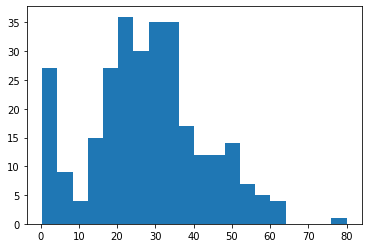

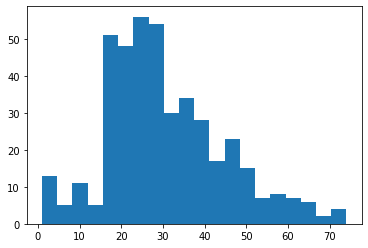

In [25]:
pl.hist(df2s["Age"], bins=20)
pl.show()
pl.hist(df2d["Age"], bins=20)
pl.show()

#### 19.(a)What is the mean age of survivors and that of dead passengers ? 

(b)What is the <u>proportion</u> of women who survived, and that of men.

Do you observe a significant difference ?

In [ ]:
meanAgeSurvivors = np.mean(df2s["Age"])
meanAgeDead = np.mean(df2d["Age"])

ratioFemaleSurvived = len(df2s[df2s["Sex"] == "female"])/len(df2s)
ratioMaleSurvived = len(df2s[df2s["Sex"] == "male"])/len(df2s)

print(meanAgeSurvivors)
print(meanAgeDead)
print(ratioFemaleSurvived)
print(ratioMaleSurvived)

28.343689655172415
30.62617924528302
0.6812865497076024
0.31871345029239767


**Your answer**:
the average age of survivors is slightly lower than that of the dead, but not by much. On the other hand, the ratio of women who survived compared to men is very high. This might be because women and children are usually prioritized in evacuation protocols, which makes women more likely to survive compared to men.

#### 20.What is the number of survivors/dead in each passengers' class 1,2,3 ?

Do you observe a significant difference?

In [28]:
class1Survivors = df2[(df2["Pclass"] == 1) & (df2["Survived"] == 1)]
class1Dead = df2[(df2["Pclass"] == 1) & (df2["Survived"] == 0)]
class2Survivors = df2[(df2["Pclass"] == 2) & (df2["Survived"] == 1)]
class2Dead = df2[(df2["Pclass"] == 2) & (df2["Survived"] == 0)]
class3Survivors = df2[(df2["Pclass"] == 3) & (df2["Survived"] == 1)]
class3Dead = df2[(df2["Pclass"] == 3) & (df2["Survived"] == 0)]

sumc1s = len(class1Survivors)
sumc1d = len(class1Dead)
sumc2s = len(class2Survivors)
sumc2d = len(class2Dead)
sumc3s = len(class3Survivors)
sumc3d = len(class3Dead)

print(sumc1s, sumc1d, sumc2s, sumc2d, sumc3s, sumc3d)
# you should find:
#Survivors in class  1  is  136
#Dead in class  1  is  80
#Survivors in class  2  is  87
#Dead in class  2  is  97
#Survivors in class  3  is  119
#Dead in class  3  is  372

136 80 87 97 119 372


**Your answer:**

People in class 3 have a significantly lower chance of surviving than those in class 1 or 2. People in class 1 have the highest odds of surviving, with around 60% passengers in class 1 surviving. 47% of class 2 passengers survived, and only 24% of class 3 passengers survived.

#### 21.Write a program that finds the mean age of the six groups:
*  Class =1,2,3
  * Survived or Died

*Do not use too fancy Pandas commands*

Store the results in a  list made of three lists, each containing two numbers.

Do you observe a siginificant difference ?

In [29]:
# you should find in the order of the question 
# [[35.368, 43.695], [25.902, 33.544], [20.646, 26.556]]
meanAge = [[0,0],[0,0],[0,0]]

meanAge[0][0] = np.mean(class1Survivors["Age"])
meanAge[0][1] = np.mean(class1Dead["Age"])
meanAge[1][0] = np.mean(class2Survivors["Age"])
meanAge[1][1] = np.mean(class2Dead["Age"])
meanAge[2][0] = np.mean(class3Survivors["Age"])
meanAge[2][1] = np.mean(class3Dead["Age"])

print(meanAge)
df2

[[35.36819672131148, 43.6953125], [25.90156626506024, 33.544444444444444], [20.646117647058823, 26.555555555555557]]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


**Your answer:**

Across all classes, the average age of the survivors is noticeably lower than the dead.

#### 22.Write a program that replaces in `df2` the missing values of the column `'Age'` by the mean value of the group (among the six ones found in question 21.) it belongs to.

*Do not use fancy Pandas commands*

In [30]:
class1Survivors.fillna({"Age":meanAge[0][0]}, inplace = True)
class1Dead.fillna({"Age":meanAge[0][1]}, inplace = True)
class2Survivors.fillna({"Age":meanAge[1][0]}, inplace = True)
class2Dead.fillna({"Age":meanAge[1][1]}, inplace = True)
class3Survivors.fillna({"Age":meanAge[2][0]}, inplace = True)
class3Dead.fillna({"Age":meanAge[2][1]}, inplace = True)

df2 = pd.concat([class1Survivors,class1Dead,class2Survivors,class2Dead,class3Survivors,class3Dead])
df2.sort_index(ascending = True,inplace = True) #sort based on index because pd.concat sorts based on class and survival
df2x = df2[features]
df2x

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,26.555556,1,2,23.4500
889,1,26.000000,0,0,30.0000


Define `df2x` as the DataFrame of features (as in question 9.) 

#### 23.Recycle the function `learn` that you have written in question 14., and re-run a score tests with `max_depth` from 1 to 15 (as you have done in question 15.) and with `df2x` (instead of `dfx` in quesion 15.)



In [31]:
## I obtained this (again, there are random choices that are not the same for you.
## IT IS NORMAL THAT YOU DON'T OBTAIN EXACTLY THE SAME
for k in range(1,16):
  result = learn(df2x, res, k)
  print("max depth = " + str(k) + " score train = " + str(result[0]) + " score test = " + str(result[1]))

#max depth= 1  score train.= 0.666  score test= 0.673
#max depth= 2  score train.= 0.704  score test= 0.713
#max depth= 3  score train.= 0.735  score test= 0.726
#max depth= 4  score train.= 0.766  score test= 0.758
#max depth= 5  score train.= 0.783  score test= 0.753
#max depth= 6  score train.= 0.816  score test= 0.758
#max depth= 7  score train.= 0.85  score test= 0.726
#max depth= 8  score train.= 0.882  score test= 0.722
#max depth= 9  score train.= 0.915  score test= 0.713
#max depth= 10  score train.= 0.933  score test= 0.726
#max depth= 11  score train.= 0.955  score test= 0.709
#max depth= 12  score train.= 0.969  score test= 0.713
#max depth= 13  score train.= 0.975  score test= 0.731
#max depth= 14  score train.= 0.978  score test= 0.717

max depth = 1 score train = 0.6587078651685393 score test = 0.7039106145251397
max depth = 2 score train = 0.6980337078651685 score test = 0.6703910614525139
max depth = 3 score train = 0.7415730337078652 score test = 0.7541899441340782
max depth = 4 score train = 0.7317415730337079 score test = 0.7039106145251397
max depth = 5 score train = 0.8019662921348315 score test = 0.7877094972067039
max depth = 6 score train = 0.8146067415730337 score test = 0.7988826815642458
max depth = 7 score train = 0.8384831460674157 score test = 0.7597765363128491
max depth = 8 score train = 0.8553370786516854 score test = 0.7541899441340782
max depth = 9 score train = 0.8932584269662921 score test = 0.7430167597765364
max depth = 10 score train = 0.9058988764044944 score test = 0.7039106145251397
max depth = 11 score train = 0.9297752808988764 score test = 0.7094972067039106
max depth = 12 score train = 0.9424157303370787 score test = 0.6983240223463687
max depth = 13 score train = 0.9578651685393258 s

 Do you observe an improvement compared to the values obtained in question 15.?



**Your answer:**
There are some improvements but none very significant.

## Part E. Taking into account non numerical data (dummy variables)

The columns `'Sex'` and `'Embarked'` have datatype `str` and thus have not been taken into account. But since they take only 2 or 3 possible values, they can easily be turned to numerical values. They become "*dummy variables*".



#### 24.Write a Pandas program that transforms `'male'` to 0 in column `'Sex'` of `df2`, and to 1 for `'female'`.

In [ ]:
df2["Sex"] = df2["Sex"].replace({"male": 0, "female": 1})
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,1,26.555556,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0,26.000000,0,0,111369,30.0000,C148,C


#### 25.We could process the values of column `'Embarked`' similarly with values 0,1,2 (instead of  'C' (Cherbourg), 'D' (Southampton) and 'Q' (Queensland) ).

But models  prefer binary variables 0 or 1 for the simpicity and robustness of analysis they offer.

$\rightarrow$ Add two new columns 'Q' and 'S' to the dataframe `df2` and fill them as follows:
* a given row in new column 'Q' is 1, if it is 'Q' in column `'Embarked'`, 0 else.
* a given row in new column 'S' is 1, if it is 'S' in column `'Embarked'`, 0 else.

We can deduce that a passenger embarked at Cherbourg ('C' in column `'Embarked'`) if both values in the two new columns 'Q' and 'S' are 0.


In [ ]:
embarkQ = []
for q in range(len(df2)):
  if df2["Embarked"].iloc[q] == "Q":
    embarkQ += [1]
  else:
    embarkQ += [0]
df2["Q"] = embarkQ

embarkS = []
for s in range(len(df2)):
  if df2["Embarked"].iloc[s] == "S":
    embarkS += [1]
  else:
    embarkS += [0]
df2["S"] = embarkS

df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,1,35.000000,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,0,35.000000,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,1,19.000000,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,1,26.555556,1,2,W./C. 6607,23.4500,NaN,S,0,1
889,890,1,1,0,26.000000,0,0,111369,30.0000,C148,C,0,0


#### 26.Now we can take into account the columns `'Sex'`, `'Q'` and `'S'` as features (in addition to the initial `'Age'`, `'Pclass'`, '`SibSp`', `'Parch'`, and `'Fare'`).

Add these three columns' labels to the list `features` of question 9.(a), and define a dataframe of these features called **`df2new`** (extracted from `df2`).

Recycle the program `learn` of question 14., and as in question 15. run it with `max_depth=j` for `j=1..15` and `df2new`.
Print the `max_depth`, score on training set and score on testing set.

Do you observe a significant improvement on the testing score?

In [ ]:
## I obtained this (again, there are random choices that are not the same for you.
## IT IS NORMAL THAT YOU DON'T OBTAIN EXACTLY THE SAME

features += ["Sex", "Q", "S"]
df2new = df2[features]

for j in range(1,16):
  result = learn(df2new, res, j)
  print("max depth = " + str(j) + " score train = " + str(result[0]) + " score test = " + str(result[1]))

#max depth= 1  score train.= 0.789  score test= 0.78
#max depth= 2  score train.= 0.795  score test= 0.776
#max depth= 3  score train.= 0.837  score test= 0.816
#max depth= 4  score train.= 0.85  score test= 0.821
#max depth= 5  score train.= 0.858  score test= 0.807
#max depth= 6  score train.= 0.883  score test= 0.816
#max depth= 7  score train.= 0.913  score test= 0.843
#max depth= 8  score train.= 0.918  score test= 0.825
#max depth= 9  score train.= 0.933  score test= 0.83
#max depth= 10  score train.= 0.951  score test= 0.816
#max depth= 11  score train.= 0.961  score test= 0.803
#max depth= 12  score train.= 0.967  score test= 0.816
#max depth= 13  score train.= 0.978  score test= 0.798
#max depth= 14  score train.= 0.979  score test= 0.803

max depth = 1 score train = 0.7865168539325843 score test = 0.7877094972067039
max depth = 2 score train = 0.7921348314606742 score test = 0.7821229050279329
max depth = 3 score train = 0.8469101123595506 score test = 0.8100558659217877
max depth = 4 score train = 0.8539325842696629 score test = 0.8491620111731844
max depth = 5 score train = 0.8721910112359551 score test = 0.8603351955307262
max depth = 6 score train = 0.8735955056179775 score test = 0.8659217877094972
max depth = 7 score train = 0.8974719101123596 score test = 0.8379888268156425
max depth = 8 score train = 0.9044943820224719 score test = 0.8715083798882681
max depth = 9 score train = 0.9157303370786517 score test = 0.8659217877094972
max depth = 10 score train = 0.9339887640449438 score test = 0.8435754189944135
max depth = 11 score train = 0.9550561797752809 score test = 0.8435754189944135
max depth = 12 score train = 0.9691011235955056 score test = 0.8324022346368715
max depth = 13 score train = 0.9719101123595506 s

**Your answer:**
After taking into account the sex and embarkation ports, the score improved significantly on the test set.

#### 27.**Prediction** In question 26., identify the `max_depth` that gave the best (testing) score. 

Predict if the passengers ID  812 and ID 888 are likely to survive or to die under this model. Check with the column "Survived".

In [ ]:
# max_depth = 8 gave the best testing score.

modelPredict = learn(df2new, res, 12)[2] #P why 12 ??

# PassengerID is index number +1 so we subtract one to access the correct passengers
survival812 = modelPredict.predict(df2new.iloc[811:812])
survival888 = modelPredict.predict(df2new.iloc[887:888])

print("The model predicts:")
print(survival812, survival888)

# Checking with the actual data
print("The actual data:")
print(df2.iloc[811]["Survived"], df2.iloc[887]["Survived"])

The model predicts:
[0] [1]
The actual data:
0 1


The model correctly predicted the survival (and death) of both passengers.